In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('C:\\Users\\Master\\Desktop\\dataTools')
import dataTools as dt


In [2]:
rawTrain = pd.read_csv('C:\\Users\\Master\\Desktop\\snb edu_codes\\4. Overfit\\california_housing_train.csv')
rawTest = pd.read_csv('C:\\Users\\Master\\Desktop\\snb edu_codes\\4. Overfit\\california_housing_test.csv')

In [3]:
rawTrain.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
rawTest.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
rawTrain.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [6]:
features = rawTrain.drop(columns = 'median_house_value')
target = rawTrain['median_house_value']

In [7]:
features.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000


In [8]:
features.corr().style.background_gradient()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000


In [9]:
features.corr().style.background_gradient().set_precision(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000,-0.925,-0.114,0.047,0.072,0.102,0.060,-0.015
latitude,-0.925,1.000,0.016,-0.039,-0.069,-0.111,-0.075,-0.080
housing_median_age,-0.114,0.016,1.000,-0.361,-0.320,-0.296,-0.303,-0.116
total_rooms,0.047,-0.039,-0.361,1.000,0.928,0.860,0.919,0.195
total_bedrooms,0.072,-0.069,-0.320,0.928,1.000,0.881,0.981,-0.013
population,0.102,-0.111,-0.296,0.860,0.881,1.000,0.909,-0.001
households,0.060,-0.075,-0.303,0.919,0.981,0.909,1.000,0.008
median_income,-0.015,-0.080,-0.116,0.195,-0.013,-0.001,0.008,1.000


In [10]:
def betterCorr(x, width=15, height=7):
    plt.figure(figsize=(width,height))
    mask = np.zeros_like(x.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(x.corr(), annot=True, fmt='.2f', mask=mask, cmap='seismic')
    plt.show()

<ipython-input-10-dba9bc86554a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


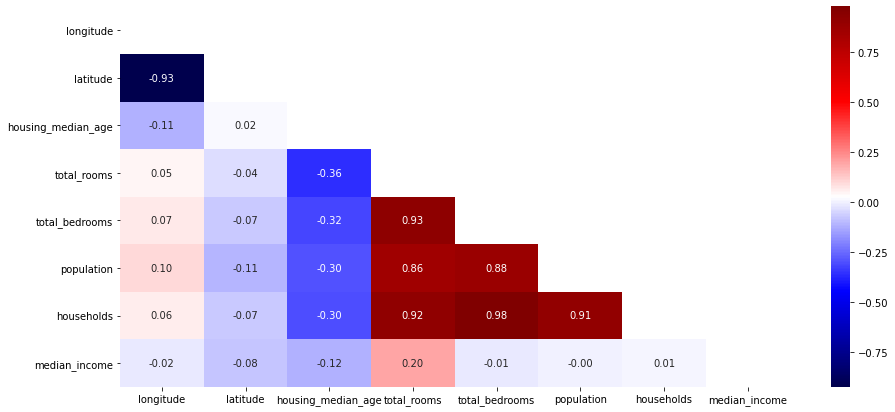

In [11]:
betterCorr(features)

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(x):
    vifFrame = pd.DataFrame()
    vifFrame['vif factor'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1]) ]
    vifFrame['features'] = x.columns
    return vifFrame

<ipython-input-10-dba9bc86554a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


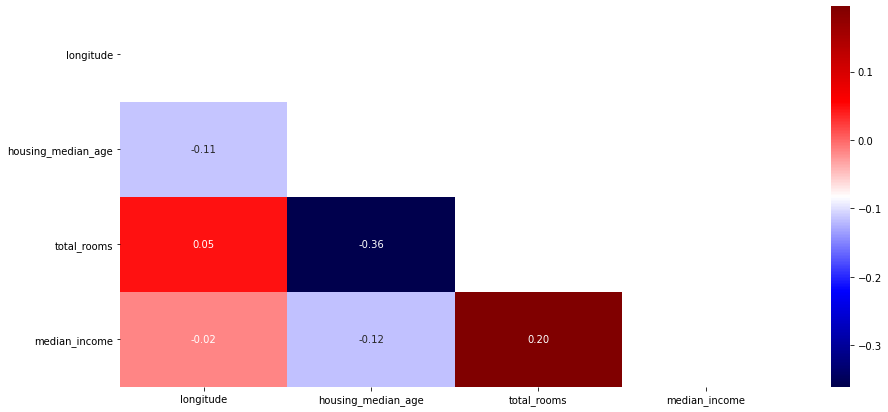

In [13]:
betterCorr(features.drop(columns=['latitude', 'total_bedrooms', 'population', 'households',]))

In [14]:
vif(features)

,vif factor,features
0,615.268673,longitude
1,549.530177,latitude
2,7.271744,housing_median_age
3,30.044820,total_rooms
4,96.656002,total_bedrooms
5,16.638519,population
6,96.284435,households
7,8.253099,median_income


In [15]:
vif(features.drop(columns=['longitude', 'latitude',]))

,vif factor,features
0,3.574735,housing_median_age
1,27.014005,total_rooms
2,89.215256,total_bedrooms
3,15.802222,population
4,95.172568,households
5,4.805563,median_income


In [16]:
vif(features.drop(columns=['longitude', 'latitude', 'households', 'total_bedrooms', 'total_rooms']))

,vif factor,features
0,2.885765,housing_median_age
1,2.027615,population
2,3.344828,median_income


<ipython-input-10-dba9bc86554a>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(x.corr(), dtype=np.bool)


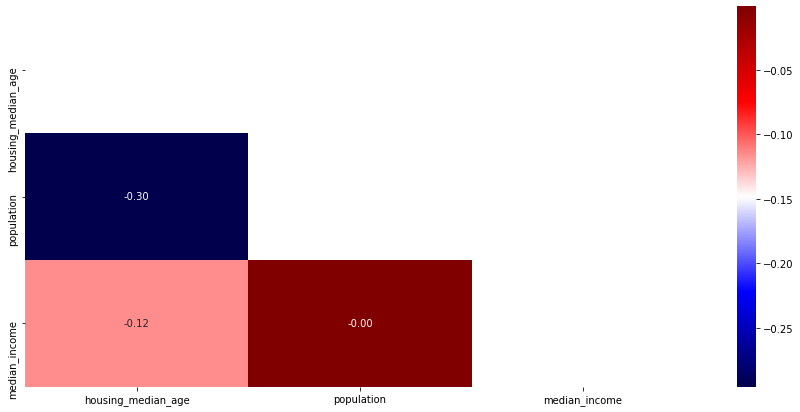

In [17]:
betterCorr(features.drop(columns=['longitude', 'latitude', 'households', 'total_bedrooms', 'total_rooms']))

In [18]:
np.random.seed(123)
colname = np.array(['random_{}'.format(i) for i in range(1, 9)])
randFrame = pd.DataFrame(np.random.randint(1, 100, size=features.shape), columns=colname)
featuresRd = pd.concat([features, randFrame], axis=1)
featuresRd

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,random_1,random_2,random_3,random_4,random_5,random_6,random_7,random_8
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,67,93,99,18,84,58,87,98
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,97,48,74,33,47,97,26,84
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,79,37,97,81,69,50,56,68
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,3,85,40,67,85,48,62,49
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,8,93,53,98,86,95,28,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,99,79,43,82,74,9,25,20
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,38,68,30,83,43,6,83,6
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,77,76,73,51,38,31,62,95
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,24,51,5,74,87,79,93,3


In [19]:
def rSquare( x, y, yhat ):
    if x.ndim == 1: p, n = 1, x.shape[0]
    else: p, n = x.shape[1], x.shape[0]
    r2 = 1 - np.sum( (y - yhat) ** 2) / np.sum( (y - np.mean(y)) ** 2 ) 
    adj_r2 = 1 - (1 - r2) * ( n - 1) / ( n - p - 1 )
    return {'r2': r2, 'adjr2': adj_r2}

In [20]:
def forward(model, x, y, selected_columns):
    forward_columns = [ col for col in featuresRd.columns if col not in selected_columns ]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        result.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [21]:
from sklearn.linear_model import LinearRegression
def forward_select(x, y):
    selected_columns = []
  
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        best_model = forward(model, featuresRd, target, selected_columns)
  
        if not i:
            before_model = best_model
        else: 
            if best_model.score > before_model.score: before_model = best_model
            else: break
        selected_columns = best_model.columns
    return before_model

In [22]:
best_model = forward_select(featuresRd, target)
best_model

model                                     LinearRegression()
score                                                0.64128
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [23]:
display(best_model.score)
display(best_model.columns)
best_model.model.score( featuresRd[best_model.columns], target )

0.6412795836856524

['median_income',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'total_rooms',
 'latitude',
 'longitude',
 'households',
 'random_8',
 'random_4',
 'random_1']

0.6414600664083075

In [24]:
model = LinearRegression().fit(features[['median_income','housing_median_age','population']], target)
yhat = model.predict(features[['median_income','housing_median_age','population']])
score = rSquare(features[['median_income','housing_median_age','population']], target, yhat)
display(score)

{'r2': 0.5150206852133975, 'adjr2': 0.5149350804861463}

In [25]:
from itertools import combinations

In [26]:
selected_columns = featuresRd.columns
for combi in combinations(selected_columns, len(selected_columns)-1):
    print(combi)

('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_7')
('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_6', 'random_8')
('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_5', 'random_7', 'random_8')
('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3', 'random_4', 'random_6', 'random_7', 'random_8')
('longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'random_1', 'random_2', 'random_3'

In [27]:
def backward(model, x, y, selected_columns):
    result = []
    for combi in combinations(selected_columns, len(selected_columns)-1):
        columns = list(combi)
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        result.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [28]:
def backward_drop(x, y):
    selected_columns = x.columns
    for i in range(0, x.shape[1]):
        model = LinearRegression()
        best_model = backward(model, featuresRd, target, selected_columns)
        if not i:
            before_model = best_model
        else:
            if best_model.score > before_model.score: before_model = best_model
            else: break
        selected_columns = best_model.columns
    return before_model

In [29]:
ret = dt.backward_elimination(featuresRd, target)

In [30]:
display(ret.columns)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'random_1',
 'random_4',
 'random_8']

In [31]:
def forward(model, x, y, selected_columns):
    forward_columns = [ col for col in featuresRd.columns if col not in selected_columns ]
    result = []
    for column in forward_columns:
        columns = selected_columns + [column]
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        result.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

def backward(model, x, y, selected_columns):
    result = []
    for combi in combinations(selected_columns, len(selected_columns)-1):
        columns = list(combi)
        model = model.fit(x[columns], y)
        yhat = model.predict(x[columns])
        score = rSquare(x[columns], y, yhat)
        result.append( {'model': model, 'score': score['adjr2'], 'columns': columns} )
  
    models = pd.DataFrame(result)
    best_model = models.loc[ models.score.argmax() ]
    return best_model

In [32]:
def step_wise(x, y):
    selected_columns = []

    for i in range(x.shape[1]):
        model = LinearRegression()
        forward_model = forward(model, x, y, selected_columns)
        selected_columns = forward_model.columns

        if i < 1: before_model = forward_model; continue

        backward_model = backward(model, x, y, selected_columns)
        large_model = forward_model
        if forward_model.score < backward_model.score:
            selected_columns = backward_model.columns
            large_model = backward_model
    
        if large_model.score > before_model.score: before_model = large_model
        else: break
    return before_model

In [33]:
ret = step_wise(featuresRd, target)
ret

model                                     LinearRegression()
score                                                0.64128
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [35]:
ret2 = dt.stepwise_selection(featuresRd, target)
ret2

model                                     LinearRegression()
score                                                0.64128
columns    [median_income, housing_median_age, total_bedr...
Name: 0, dtype: object

In [36]:
ret2.columns

['median_income',
 'housing_median_age',
 'total_bedrooms',
 'population',
 'total_rooms',
 'latitude',
 'longitude',
 'households',
 'random_8',
 'random_4',
 'random_1']